In [1]:
# 使用Matplotlib绘制二维数据图表
# 创建字体属性对象用于显示中文
from matplotlib.font_manager import FontProperties
cfont = FontProperties(fname=r"C:\Windows\Fonts\simhei.ttf")

In [2]:
# 导入pyplot子模块
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv("data_emperor.csv")
df.columns = ["序号", "名号", "寿命", "生卒", "朝代"]

(array([10., 25., 48., 62., 56., 49., 36., 11.,  5.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

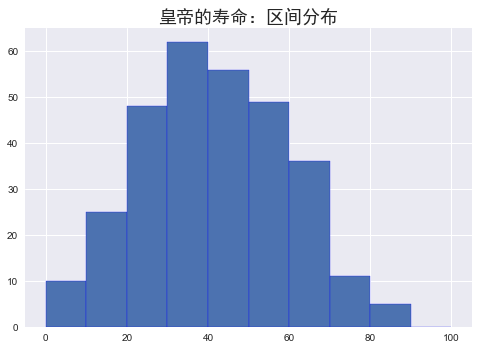

In [4]:
# 绘制直方图展示数据分布
plt.style.use("seaborn")
plt.title("皇帝的寿命：区间分布", fontproperties=cfont, fontsize=18)
plt.hist(df.寿命, range=(0, 100), edgecolor="blue")

In [5]:
# 添加出生年份和平均寿命列
df["出生年份"] = df.生卒.apply(
    lambda x: int(x.split("年", 1)[0].replace("前", "-")))
df = df.sort_values("出生年份")
df["平均寿命"] =df.寿命.rolling(20).mean()
df.head()

,序号,名号,寿命,生卒,朝代,出生年份,平均寿命
0,1,秦始皇嬴政,50,前259年—前210年,秦,-259,NaN
2,3,汉高帝刘邦,62,前256年—前195年,西汉,-256,NaN
1,2,秦二世嬴胡亥,24,前230年—前207年,秦,-230,NaN
3,4,汉惠帝刘盈,23,前210年—前188年,西汉,-210,NaN
4,5,汉文帝刘恒,46,前202年—前157年,西汉,-202,NaN


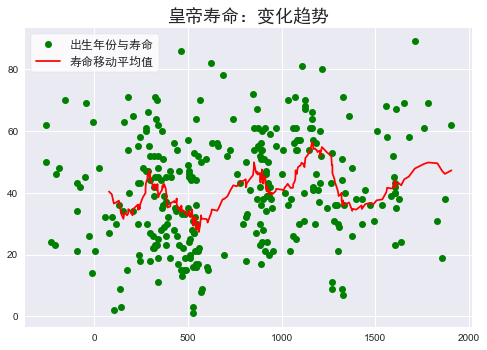

In [6]:
# 绘制线图展示变化趋势
plt.plot(df.出生年份, df.寿命, "go", label="出生年份与寿命")
plt.plot(df.出生年份, df.平均寿命, "r-", label="寿命移动平均值")
plt.title("皇帝寿命：变化趋势", fontproperties=cfont, fontsize=18)
plt.legend(
    prop={"family":cfont.get_name(), "size":12},
    loc="upper left", frameon=True, facecolor="white");